In [1]:
from src.utils import *
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')

import spacy
nlp = spacy.load('en_core_web_sm')

from tqdm import tqdm
tqdm.pandas()

from wordcloud import WordCloud

from matplotlib import pyplot as plt


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subje\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
data = read_jsonl('data/manifest.jsonl')

df = pd.DataFrame(data)
df['astralSign'] = df.birthDate.apply(date_to_astral)

df.describe()

,path,birthDate,birthPlace,deathDate,abstract,astralSign
count,33792,33792,33792,33792,33792,33792
unique,33792,24792,13148,23522,33792,12
top,http://dbpedia.org/resource/Cab_Calloway,1928-08-21,http://dbpedia.org/resource/England,2016-07-07,"Cabell Calloway III (December 25, 1907 – Novem...",Capricorn
freq,1,7,336,8,1,2993


In [31]:
df.astralSign.value_counts()

astralSign
Capricorn      2993
Aquarius       2984
Scorpio        2909
Pisces         2883
Virgo          2858
Aries          2850
Gemini         2826
Leo            2820
Libra          2784
Cancer         2744
Taurus         2596
Sagittarius    2545
Name: count, dtype: int64

In [ ]:
df.astralSign.value_counts().plot.barh()

In [19]:
df['lenAbstract'] = df.abstract.apply(len)

In [ ]:
df.lenAbstract.value_counts().sort_index()

In [ ]:
df.groupby('astralSign').describe()

In [ ]:
df.boxplot(figsize=(6,6))

In [20]:
def clean_up(text):
    removal=['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']
    # removal=['PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE']
    text_out = []
    doc= nlp(text)
    tokens = [(tok.text.lower(),tok.pos_,tok.lemma_) for sent in doc.sents for tok in sent]
    for (token,upos,lemma) in tokens:
        if token.isalpha() and len(token)>2 and upos not in removal and token not in stopwords.words("english"):
            # text_out.append(lemma)
            text_out.append(token)
    return " ".join(text_out)

In [13]:
df_w_advs = df

In [22]:
df_tokens_w_advs = df

In [21]:
df['cleanAbstract'] = df.abstract.progress_apply(clean_up)

100%|██████████| 33792/33792 [18:21<00:00, 30.67it/s]


In [39]:
df['lenCleanAbstract'] = df.cleanAbstract.apply()

In [41]:
df['lenCleanTokens'] = df.cleanAbstract.apply(lambda x : len(x.split(' ')))

In [42]:
df.groupby('astralSign').describe()

lenAbstract                                                       \
                  count        mean         std   min     25%    50%     75%   
astralSign                                                                     
Aquarius         2984.0  496.687332  519.845149  47.0  182.00  310.0  592.00   
Aries            2850.0  481.679298  532.124115  44.0  178.00  299.0  559.75   
Cancer           2744.0  493.964650  520.511791  62.0  179.00  310.0  583.00   
Capricorn        2993.0  504.342466  542.003802  56.0  179.00  307.0  605.00   
Gemini           2826.0  511.178344  558.170370  41.0  182.00  305.5  598.75   
Leo              2820.0  506.098936  598.968071  56.0  175.00  311.0  581.00   
Libra            2784.0  507.173491  530.843820  38.0  184.75  315.0  597.00   
Pisces           2883.0  501.553937  536.843249  49.0  185.50  313.0  585.00   
Sagittarius      2545.0  506.520629  530.099297  30.0  182.00  309.0  605.00   
Scorpio          2909.0  490.422138  506.456516  52.0  178.00  307.0  600.00   
Taurus           2596.0  494.616718  529.143211  51.0  177.00  305.0  598.25   
Virgo            2858.0  521.690343  566.470091  52.0  182.00  314.0  641.75   

                     lenCleanAbstract              ...                  \
                 max            count        mean  ...     75%     max   
astralSign                                         ...                   
Aquarius      4800.0           2984.0  316.210456  ...  374.25  3089.0   
Aries         6717.0           2850.0  305.047719  ...  357.00  3630.0   
Cancer        6278.0           2744.0  314.254009  ...  370.00  4378.0   
Capricorn     5312.0           2993.0  321.484130  ...  385.00  2992.0   
Gemini        6401.0           2826.0  323.020170  ...  382.00  3734.0   
Leo          11761.0           2820.0  320.939716  ...  373.00  6891.0   
Libra         4640.0           2784.0  322.283405  ...  373.25  3010.0   
Pisces        5847.0           2883.0  319.204995  ...  370.00  3586.0   
Sagittarius   5266.0           2545.0  322.772495  ...  388.00  3344.0   
Scorpio       4333.0           2909.0  313.160880  ...  383.00  2707.0   
Taurus        5315.0           2596.0  314.244992  ...  373.25  3200.0   
Virgo         5108.0           2858.0  332.940868  ...  404.75  3322.0   

            lenCleanTokens                                                      
                     count       mean        std  min   25%   50%   75%    max  
astralSign                                                                      
Aquarius            2984.0  42.445040  44.310477  4.0  16.0  27.0  51.0  420.0  
Aries               2850.0  41.351228  45.293022  4.0  15.0  26.0  48.0  553.0  
Cancer              2744.0  42.662536  45.096945  5.0  16.0  27.0  50.0  618.0  
Capricorn           2993.0  43.182426  46.511356  4.0  15.0  27.0  51.0  437.0  
Gemini              2826.0  43.890304  47.324240  4.0  16.0  26.0  51.0  518.0  
Leo                 2820.0  43.545035  51.392725  4.0  15.0  26.0  50.0  975.0  
Libra               2784.0  43.340876  45.455445  4.0  16.0  27.0  51.0  395.0  
Pisces              2883.0  43.159209  45.653068  4.0  16.0  27.0  50.0  446.0  
Sagittarius         2545.0  43.345776  45.320408  4.0  16.0  26.0  52.0  437.0  
Scorpio             2909.0  41.997937  43.344712  4.0  15.0  26.0  51.0  348.0  
Taurus              2596.0  42.606703  45.012768  5.0  15.0  27.0  52.0  431.0  
Virgo               2858.0  44.669349  48.556541  4.0  16.0  27.0  54.0  442.0  

[12 rows x 24 columns]

In [23]:
from functools import reduce

In [ ]:
reduce(lambda a, b: a + b.split(' '), df[df['astralSign']==astral_sign].cleanAbstract, [])

In [25]:
def frequency(df, astral_sign):
    freqs = {}
    for v, c in pd.Series(' '.join(df[df['astralSign']==astral_sign].cleanAbstract).split(' ')).value_counts().items():
        freqs[v] = c
    return freqs

In [24]:
def make_wordcloud(df, astral_sign):
    return WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue').generate_from_frequencies(frequency(df, astral_sign))

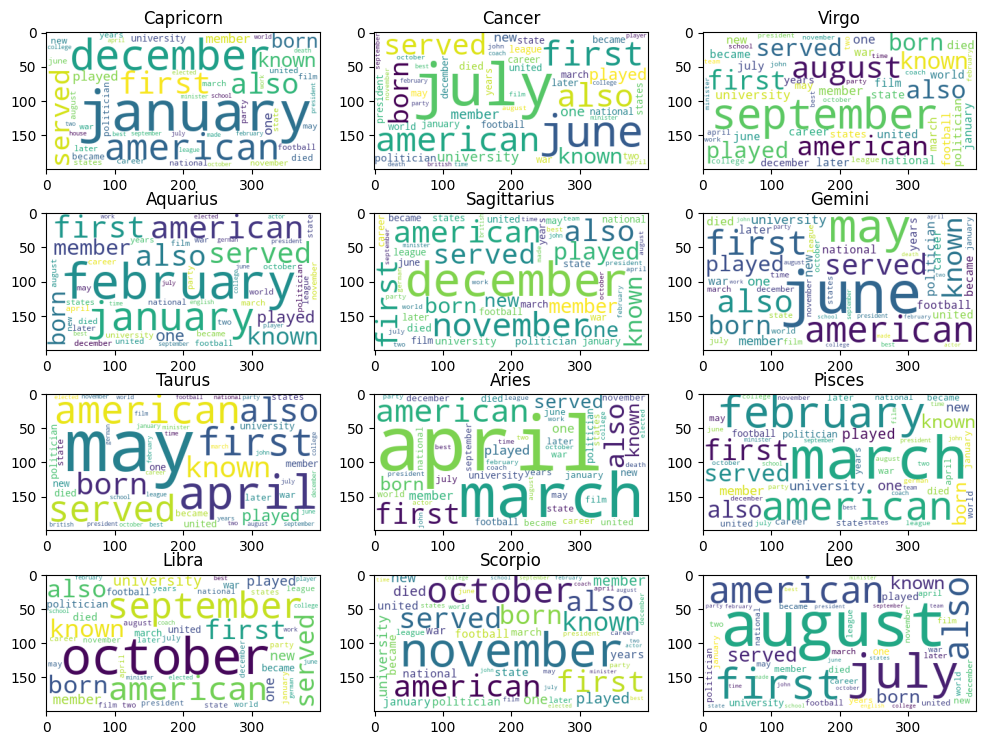

In [29]:
fig = plt.figure(figsize=(12,9))
wc = {}
for i, sign in enumerate(df.astralSign.unique()):
    wc[sign] = make_wordcloud(df, sign)
    fig.add_subplot(4,3,i+1)
    plt.imshow(wc[sign])
    plt.title(sign)

In [117]:
fdist = FreqDist(' '.join(df.cleanAbstract).split(' '))

In [119]:
fdist.most_common(50)

[('serve', 9519),
 ('american', 8485),
 ('play', 8405),
 ('first', 8056),
 ('know', 7176),
 ('bear', 7157),
 ('January', 7028),
 ('work', 6853),
 ('March', 6785),
 ('December', 6349),
 ('May', 6295),
 ('October', 6171),
 ('November', 6161),
 ('July', 6119),
 ('June', 6115),
 ('August', 6085),
 ('April', 6070),
 ('September', 6005),
 ('February', 5985),
 ('one', 5917),
 ('year', 5775),
 ('member', 5703),
 ('University', 5521),
 ('film', 5437),
 ('become', 5284),
 ('die', 5238),
 ('politician', 5230),
 ('New', 4539),
 ('United', 4286),
 ('career', 4136),
 ('States', 3541),
 ('time', 3456),
 ('two', 3411),
 ('football', 3349),
 ('include', 3343),
 ('make', 3217),
 ('War', 3050),
 ('coach', 3014),
 ('name', 2841),
 ('team', 2831),
 ('League', 2828),
 ('World', 2813),
 ('John', 2807),
 ('player', 2769),
 ('season', 2679),
 ('death', 2624),
 ('elect', 2615),
 ('National', 2613),
 ('actor', 2599),
 ('Party', 2466)]